<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/fasle2class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [41]:
from numpy import float32
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype(float32)/255

In [42]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,num_classes=10)
test_labels=to_categorical(test_labels)

In [43]:
from keras import models
from keras import layers
from keras.activations import softmax,relu
model=models.Sequential()
model.add(layers.Input(shape=(28*28,),name='input_layer'))
model.add(layers.Dense(512,activation=relu,name='prelogics'))
model.add(layers.Dense(10,activation=softmax,name='logics'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prelogics (Dense)           (None, 512)               401920    
                                                                 
 logics (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.losses import categorical_crossentropy
#from keras.optimizers import rmsprop

model.compile(optimizer='rmsprop',loss=categorical_crossentropy,metrics='accuracy')
history=model.fit(train_images,train_labels,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0304 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0130 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0094 - accuracy: 0.9977


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

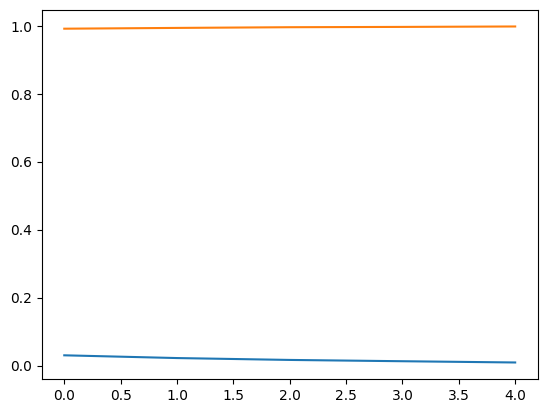

In [56]:
import matplotlib.pyplot as plt

loss=history.history['loss']
accuracy=history.history['accuracy']
plt.plot(loss)
plt.plot(accuracy)
plt.show()

In [57]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0634 - accuracy: 0.9818


[0.06340469419956207, 0.9818000197410583]

In [58]:
predict_labels=model.predict(test_images)

313/313 [==============================] - 2s 7ms/step
